Elisa Stabilini - Matricola: 28326A

# Comparative analysis training REINFORCE vs DQN eith replay buffer

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.pyplot as plt
import os
import pickle
from pathlib import Path

In [2]:
Data_path_DQL = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/'
TrainedDQLearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots'
timename_DQL = '_20241030_103421'

In [3]:
errors_file_DQL = Data_path_DQL + 'training_errors' + timename_DQL + '.npz'
rewards_file_DQL = Data_path_DQL + 'rewards' + timename_DQL + '.npy'
episode_length_file_DQL = Data_path_DQL + 'episode_length' + timename_DQL + '.npy'
episode_info_file_DQL = Data_path_DQL + 'episode_info' + timename_DQL + '.pkl'

In [5]:
Data_path_RE = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Data/'
TrainedRELearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedREINFORCE/Plots'
timename_RE = '_20241003_131258'

In [6]:
errors_file_RE = Data_path_RE + 'training_errors' + timename_RE + '.npz'
rewards_file_RE = Data_path_RE + 'rewards' + timename_RE + '.npy'
episode_length_file_RE = Data_path_RE + 'episode_length' + timename_RE + '.npy'
episode_info_file_RE = Data_path_RE + 'episode_info' + timename_RE + '.pkl'

### Loading data

In [7]:
# Load the numpy arrays
rewards_DQL = np.load(rewards_file_DQL)
episode_lengths_DQL = np.load(episode_length_file_DQL)

# Load the pickle file
with open(episode_info_file_DQL, 'rb') as file:
    episode_info_DQL = pickle.load(file)

In [8]:
# Load the numpy arrays
rewards_RE = np.load(rewards_file_RE)
episode_lengths_RE = np.load(episode_length_file_RE)

# Load the pickle file
with open(episode_info_file_RE, 'rb') as file:
    episode_info_RE = pickle.load(file)

In [9]:
rewards_DQ_normalized = (rewards_DQL - np.min(rewards_DQL))/(np.max(rewards_DQL)-np.min(rewards_DQL))
rewards_RE_normalized = (rewards_RE - np.min(rewards_RE))/(np.max(rewards_RE)-np.min(rewards_RE))


### Rewards comparison: standard training vs. replay buffer training

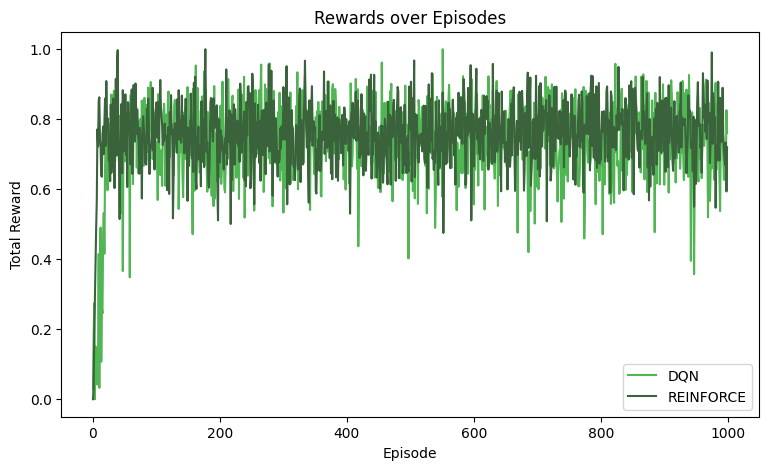

In [10]:
file_name = 'comparisonDQL_RE'

# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(rewards_DQ_normalized, label='DQN', color='#50B553') 
plt.plot(rewards_RE_normalized, label='REINFORCE', color='#3a623b')  
plt.title('Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend() 

imagefile = file_name + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)

plt.show()
 

### Dynamic plot

In [9]:
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from ipywidgets import interactive

In [10]:
print(len(episode_info_RE))

1000


In [11]:
x = episode_info_RE[0]['year']
graphs = [episode['raw_reward'] for episode in episode_info_RE]

### Error calculation

In [13]:
errors_DQL = np.load(errors_file_DQL)

step_error_DQ = errors_DQL['step_errors']
print("Length of avg_error_RE:", len(step_error_DQ))
ep_errors_DQ = errors_DQL['episode_errors']
print("Length of all_error_RE:", len(ep_errors_DQ))

Length of avg_error_RE: 29969
Length of all_error_RE: 6707


In [16]:
avg_error_DQL = ep_errors_DQ[:6000:6]
print(len(avg_error_DQL))

1000


In [19]:
errors_RE = np.load(errors_file_RE)

avg_error_RE = errors_RE['avg_error']
print("Length of avg_error_RE:", len(avg_error_RE))
all_error_RE = errors_RE['all_errors']
print("Length of all_error_RE:", len(all_error_RE))

Length of avg_error_RE: 1000
Length of all_error_RE: 0


In [22]:
avg_error_RE = (avg_error_RE - np.min(avg_error_RE))/(np.max(avg_error_RE)-np.min(avg_error_RE))

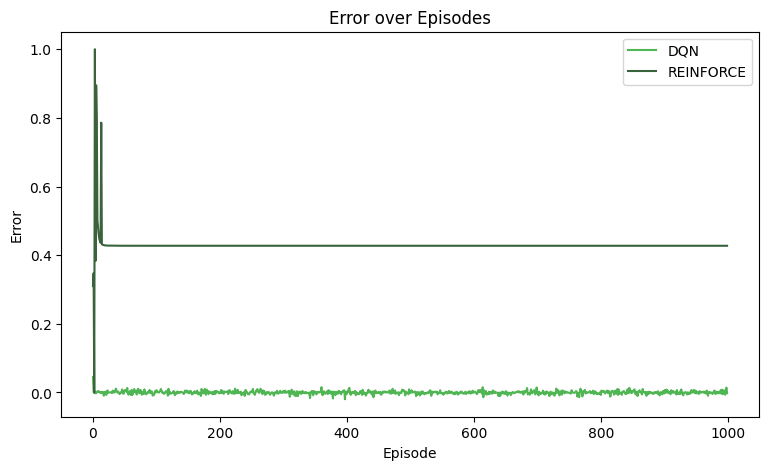

In [23]:
file_name = "REINFORCE_errorrs"

plt.figure(figsize=(9, 5))
plt.plot(avg_error_DQL, label='DQN', color='#50B553') 
plt.plot(avg_error_RE, label='REINFORCE', color='#3a623b')  

plt.title('Error over Episodes')
plt.xlabel('Episode')
plt.ylabel('Error')

# Add legend
plt.legend() 

imagefile = file_name + '.png'
if not os.path.exists(TrainedRELearning_plots):
    os.makedirs(TrainedRELearning_plots)
file_path = os.path.join(TrainedRELearning_plots, imagefile)
#plt.savefig(file_path)

plt.show()